In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Basic Graph

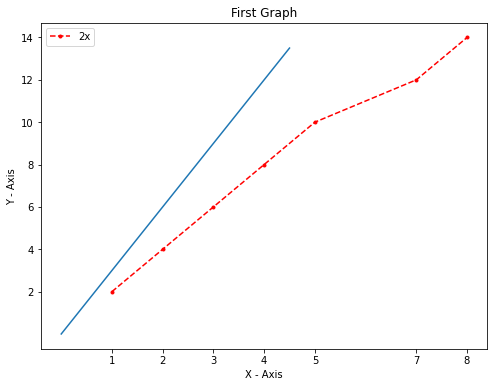

In [21]:
x = [1,2,3,4,5,7,8]
y = [2,4,6,8,10,12,14]
#plt.plot(x,y, label='2x', color='red', linewidth='2', marker='x')

plt.figure(figsize=(8,6))

plt.plot(x, y, 'r.--', label='2x')

# 2nd line
x2 = np.arange(0,5,0.5)
plt.plot(x2, x2*3)


plt.title('First Graph')
plt.xlabel('X - Axis')
plt.ylabel('Y - Axis')
plt.xticks(x)
plt.yticks(y)
plt.legend()
plt.savefig('mygraph.png', dpi=100)
plt.show()

### Bar Chart

No handles with labels found to put in legend.


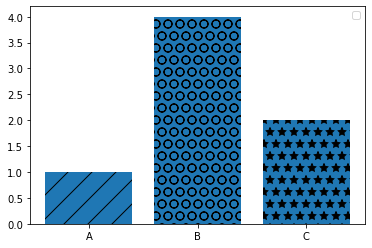

In [32]:
labels = ['A', 'B', 'C']
values = [1,4,2]
plt.figure(figsize=(6,4))

bars = plt.bar(labels, values)
patterns = ['/', 'O', '*']

for bar in bars:
    bar.set_hatch(patterns.pop(0))

#bars[0].set_hatch('/')
#bars[1].set_hatch('O')
#bars[2].set_hatch('*')


plt.legend()

plt.show()

### Real world Examples

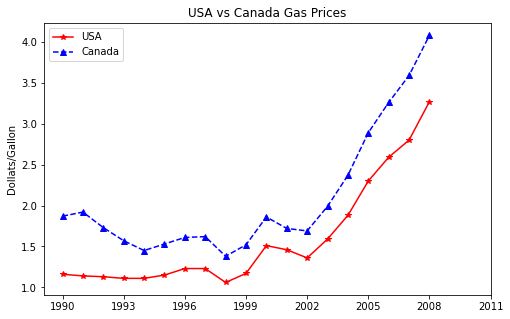

In [34]:
gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(8,5))

plt.plot(gas.Year, gas.USA, 'r-*', label = 'USA')
plt.plot(gas.Year, gas.Canada, 'b--^', label = 'Canada')

plt.title('USA vs Canada Gas Prices')
plt.ylabel('Dollats/Gallon')
plt.legend()

plt.xticks(gas.Year[::3].tolist()+[2011])

plt.show()